#### Sentiment Analysis.  
App Reviews Sentiment Analysis is the process of evaluating and understanding the sentiments expressed in user reviews of mobile applications (apps). It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.  

In this task the following shall be attended to:  

-Perform EDA by analyzing the length of the reviews and their ratings.  
-Label the sentiment data using Textblob, check distribution of sentiments (positive, negative, neutral) in the dataset.  
-Explore the relationship between the sentiments and the ratings given.  
-Analyze the text of the reviews to identify common themes or words in different sentiment categories using wordcloud

Data source:Aman Kharwal 



In [1]:
# bring in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# bring in the data set
df=pd.read_csv(r'C:\Users\user\Desktop\linkedin-reviews.csv')

In [3]:
# have a quick view of top lower the data set
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
# check for missing values
df.isnull().sum()

Review    0
Rating    0
dtype: int64

#### Task 1:  
Perform EDA by analyzing the length of ratings and plotting it.  
Calculating the length of reviews and plotting it.

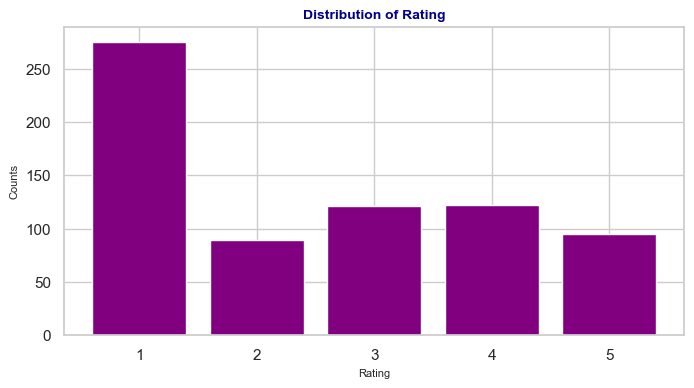

In [5]:
# Plotting the distribution of ratings
r =df['Rating'].value_counts()
sns.set(style="whitegrid")
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(r.index,r.values,color='purple')
ax.set_title('Distribution of Rating',fontsize=10,fontweight='bold',color='darkblue')
ax.set_xlabel('Rating',fontsize=8)
ax.set_ylabel('Counts',fontsize=8)
plt.show()

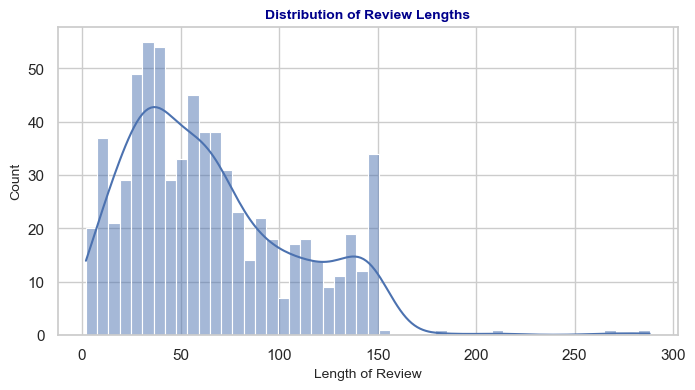

In [6]:
# Calculating the length of each review
df['Review Length'] = df['Review'].apply(len)

# Plotting the distribution of review lengths
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths',fontsize=10,fontweight='bold',color='darkblue')
plt.xlabel('Length of Review',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()

#### Task 2:  
Adding Sentiment Labels  - using Textblob.  
Analyze app review sentiment and check the distribution  

In [9]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/624.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/624.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/624.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/624.3 kB ? eta -:--:--
   ------ ------------------------------- 112.6/624.3 kB 364.4 kB/s eta 0:00:02
   ------ --------------

In [10]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classify based on polarity
    if sentiment.polarity > 0.05:
        return 'Positive'
    elif sentiment.polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
df.head()

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


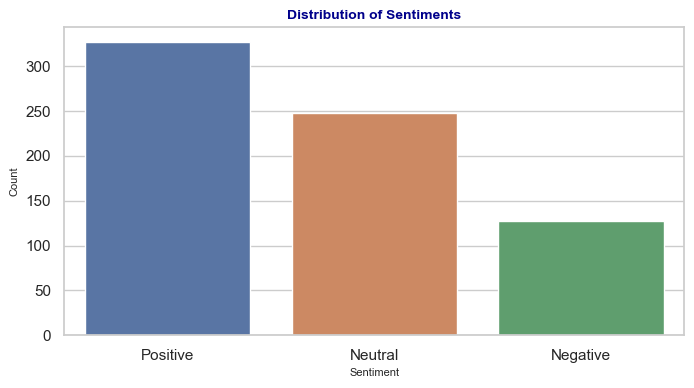

In [12]:
# Analyzing the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Plotting the distribution of sentiments
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments',fontsize=10,fontweight='bold',color='darkblue')
plt.xlabel('Sentiment',fontsize=8)
plt.ylabel('Count',fontsize=8)
plt.show()

#### Task 3:  
Explore the relationship between sentiment and ratings


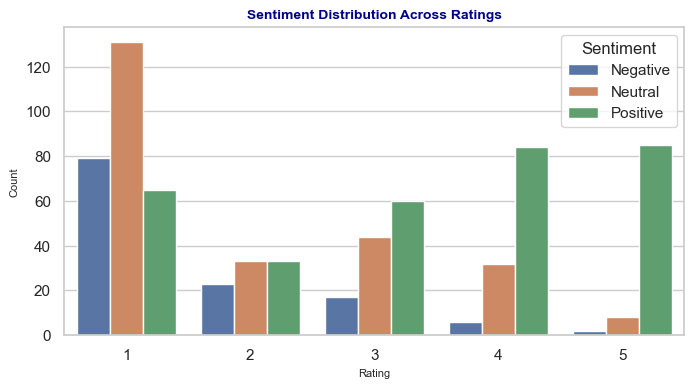

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings',fontsize=10,fontweight='bold',color='darkblue')
plt.xlabel('Rating',fontsize=8)
plt.ylabel('Count',fontsize=8)
plt.legend(title='Sentiment')
plt.show()

#### Task 4:
Carry out text analysis of the reviews. - using WordCloud

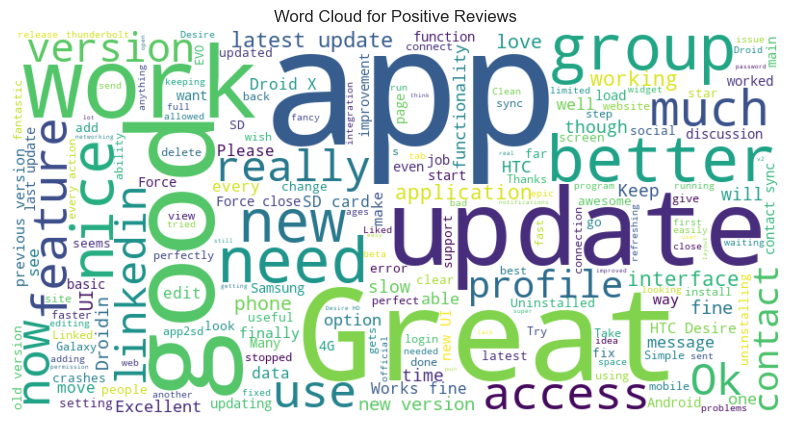

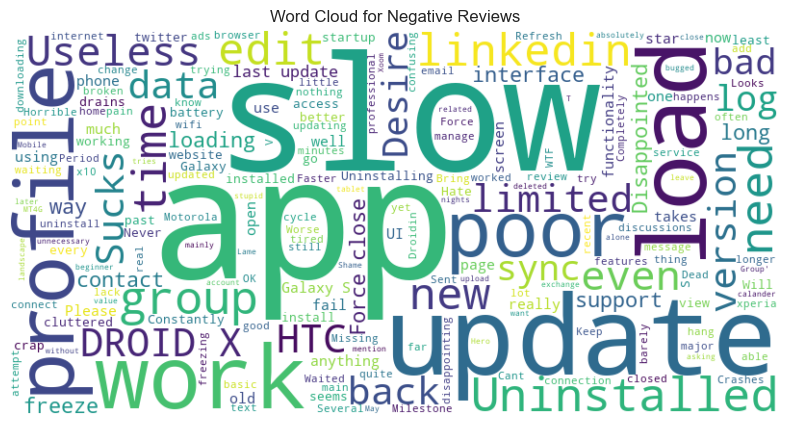

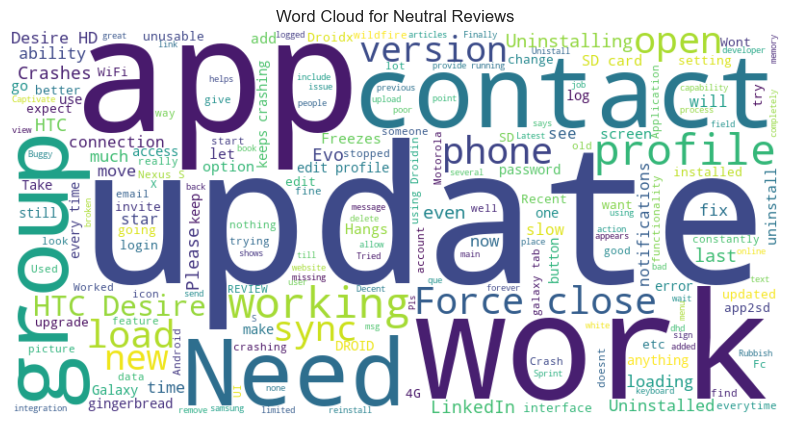

In [14]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()
    
    
# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)   

#### Summary:  

App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community. 